#### Objective
Develop a model to predict the impact of increasing horsepower (HP) on fuel economy (Mileage per Gallon (MPG)) using Linear Regression model, the data set is below:
- Independent variable X: Horsepower (HP)
- Dependent variable Y: Mileage per Gallon (MPG)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Data Understanding

In [3]:
fuelecon_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\3. Simple Linear Regression\\FuelEconomy.csv")

In [4]:
fuelecon_df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
fuelecon_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
fuelecon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
fuelecon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Horse Power,100.0,213.676190,62.061726,50.0,174.996514,218.928402,251.706476,350.0
Fuel Economy (MPG),100.0,23.178501,4.701666,10.0,20.439516,23.143192,26.089933,35.0


In [8]:
print(f'Fuel Economy shape:', fuelecon_df.shape)
print(f'Fuel Economy shape:',fuelecon_df.columns.to_list())

Fuel Economy shape: (100, 2)
Fuel Economy shape: ['Horse Power', 'Fuel Economy (MPG)']


#### Exploratory Data Analysis

<Figure size 800x600 with 0 Axes>

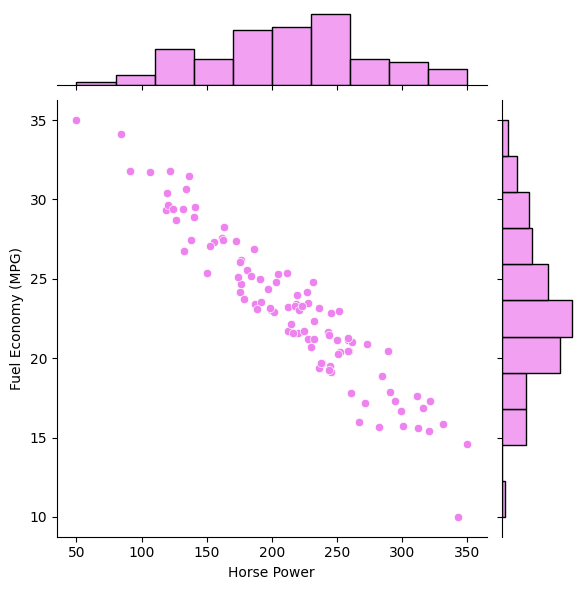

In [9]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuelecon_df, color='violet')
plt.show()

<Figure size 800x600 with 0 Axes>

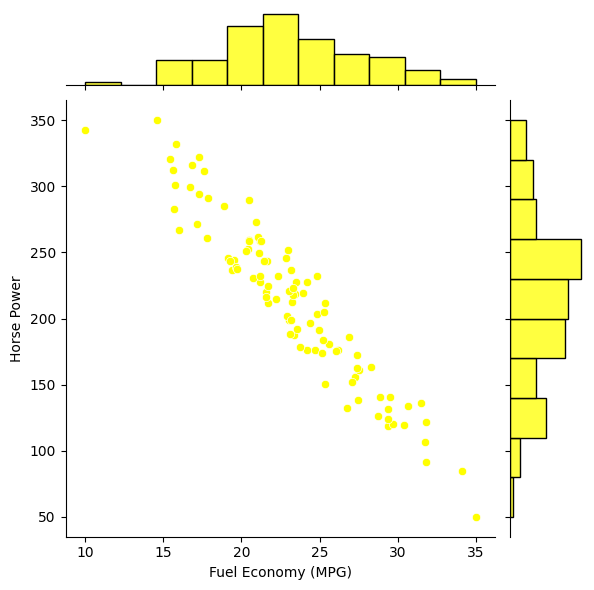

In [10]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Fuel Economy (MPG)', y='Horse Power', data=fuelecon_df, color='yellow')
plt.show()

<Figure size 800x600 with 0 Axes>

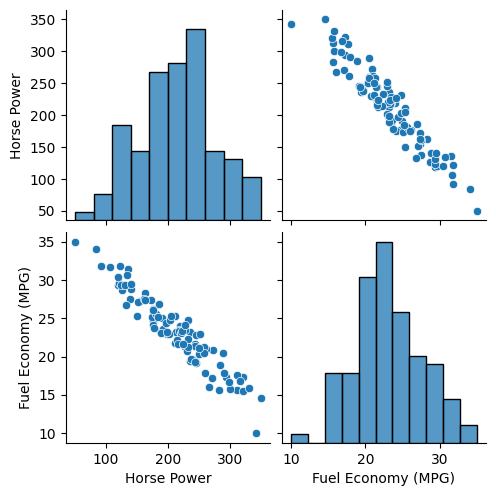

In [11]:
plt.figure(figsize=(8,6))
sns.pairplot(data=fuelecon_df)
plt.show()

<Figure size 800x600 with 0 Axes>

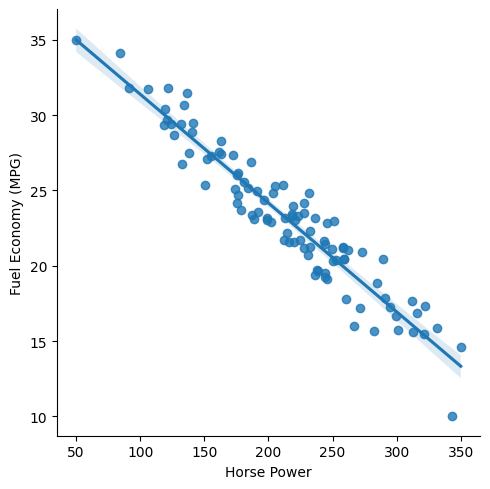

In [12]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fuelecon_df)
plt.show()

<Figure size 800x600 with 0 Axes>

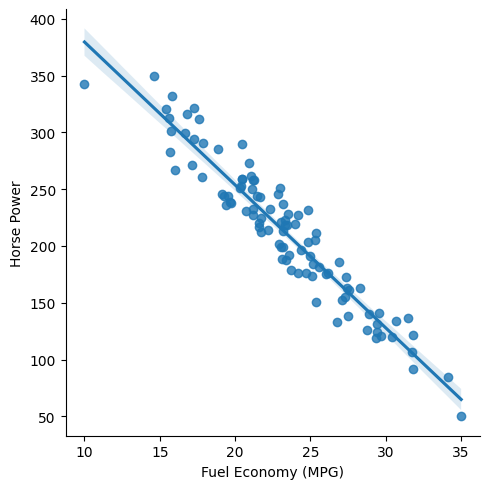

In [13]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Fuel Economy (MPG)', y='Horse Power', data=fuelecon_df)
plt.show()

#### Creating Train and Test Set

In [14]:
X = fuelecon_df[['Horse Power']]
y = fuelecon_df['Fuel Economy (MPG)']

In [16]:
display(X.shape)
display(y.shape)

(100, 1)

(100,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(80, 1)

(80,)

(20, 1)

(20,)

#### Training the Model

In [20]:
fuelecon_df.duplicated().sum()

0

In [21]:
fuelecon_df.isnull().sum()

Horse Power           0
Fuel Economy (MPG)    0
dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
print('Linear Model Coeff (m):', lr.coef_)
print('Linear Model Coeff (b):', lr.intercept_)

Linear Model Coeff (m): [-0.0733005]
Linear Model Coeff (b): 38.87725908247731


In [26]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [29]:
print('Linear Model Coeff (m):', lr2.coef_)
print('Linear Model Coeff (b):', lr2.intercept_)

Linear Model Coeff (m): [0.09647489]
Linear Model Coeff (b): 0.0


#### Test the Model

In [30]:
y_predict = lr.predict(X_test)

In [31]:
y_predict

array([21.85566531, 20.50014248, 22.51807886, 29.1525131 , 22.18889979,
       20.36504254, 29.93165405, 24.29351481, 15.28617054, 30.17129996,
       29.79637526, 13.22208354, 19.68336809, 18.16222608, 21.45570273,
       22.85418435, 23.15543817, 15.3513636 , 27.48523469, 25.97789405])

In [32]:
y_test

83    21.216359
53    20.291766
70    23.307192
45    26.778148
44    21.205987
39    20.407571
22    31.796612
80    23.172223
10    17.300628
0     29.344195
18    29.393330
30    14.589079
73    21.050399
33    15.676316
90    19.723462
4     23.426739
76    22.183092
77    15.441711
12    27.294930
31    26.188478
Name: Fuel Economy (MPG), dtype: float64

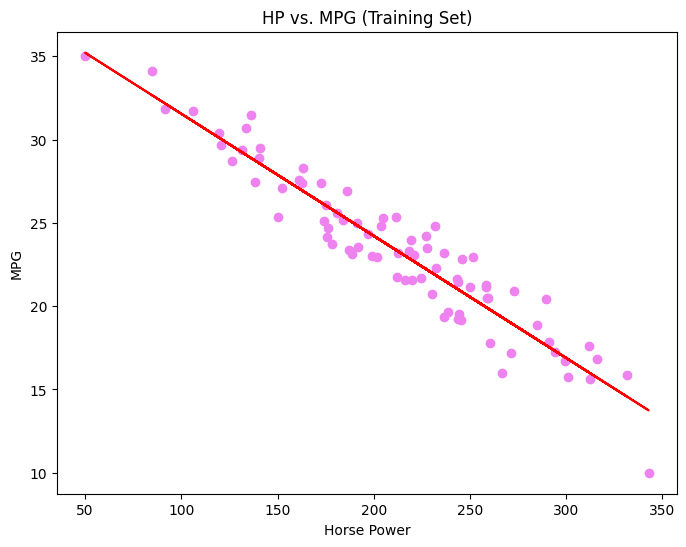

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='violet')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Training Set)')
plt.show()

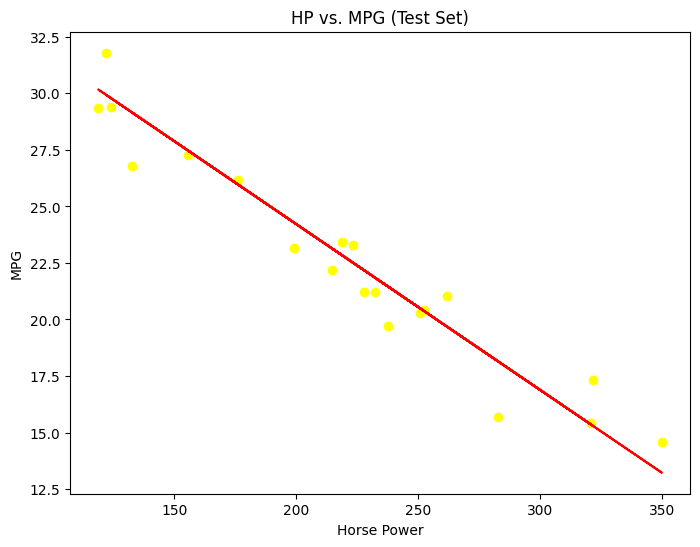

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_test, y_predict, color='red')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Test Set)')
plt.show()

In [36]:
y_predict2 = lr2.predict(X_test)

In [37]:
y_predict2

array([22.40307218, 24.18715164, 21.53123264, 12.79928244, 21.96448364,
       24.36496424, 11.77381143, 19.19448202, 31.04955192, 11.45840003,
       11.95185941, 33.76621234, 25.26215413, 27.26421426, 22.92948532,
       21.08886539, 20.69236838, 30.96374769, 14.99368087, 16.97757625])

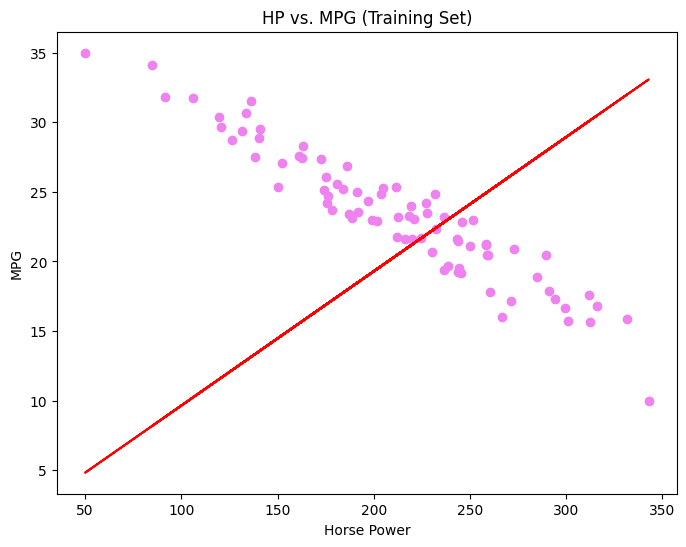

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='violet')
plt.plot(X_train, lr2.predict(X_train), color='red')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Training Set)')
plt.show()

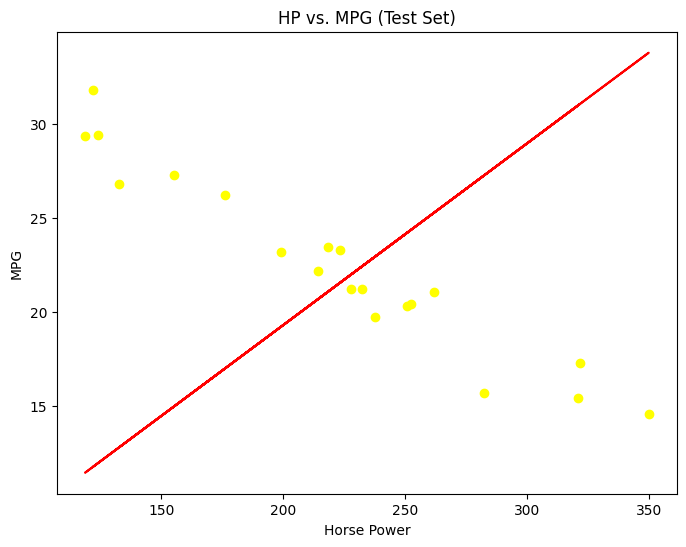

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_test, y_predict2, color='red')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Test Set)')
plt.show()

In [47]:
new_HP = {'Horse Power':[[356], [367], [389], [500]]}
new_HP_df = pd.DataFrame(new_HP['Horse Power'], columns=['Horse Power'])
mpg = lr.predict(new_HP_df)

In [48]:
mpg

array([12.78228053, 11.97597501, 10.36336398,  2.22700831])

#### Model Evaluation

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9291686655135908
Mean Absolute Error: 1.012788761356716
Mean Squared Error: 1.5800089782634312
Root Mean Squared Error: 1.256984080354016
Adjusted R-squared: 0.9252335913754569
